# 베이지안 가설검정
## 동기
### 빈도주의 가설검정의 문제점
1. 분석 과정이 어렵고 결과가 직관적이지 않다.
2. p-value는 오해가 쉽다.
3. 가설 의존적이다.

## 베이지안은?
### 장점&특징
1. **확률(=사후확률)** 을 구하고 이를 바탕으로 검정을 수행하기 때문에 결론이 **직관적**이다.
2. 가설에 의존적이지 않다.

### 간단한 예제
#### 필수개념
* 베이즈정리
\begin{eqnarray}
p(\theta|x) &=& \frac{p(\theta,x) }{ p(x) } \nonumber \\
&=& \frac{p(\theta|x)p(x)}{p(x)} \nonumber\\
&=& \frac{p(\theta|x)p(x)}{\int p(\theta|x)p(\theta)} \nonumber
\end{eqnarray}


* 사전분포 = 사전정보 = prior,prior distribution : 자료를 얻기 전에 $\theta$ 에 대하여 가지고 이는 정보 혹은 믿음, $\pi(\theta)$ 로 나타냄  


* 사후분포 = posterior, posterior distribution : 자료 $X=x$ 를 얻고 난 후 $\theta$에 대한 정보  


$$\pi(\theta|x)=\frac{\pi(\theta)f(x|\theta)}{\int \pi(\theta)f(x|\theta) d\theta}$$


```
(참고) 베이즈 정리 떠올리기
A,B,C 공장 생산비율 0.25,0.25,0.5 불량률 0.2,0.25,0.1 일때
불량품이 발견되었을때 A공장에서 나올 확률은?  
sol) 
```

\begin{eqnarray}
p(A|불량)&=&\frac{p(A|불량)}{p(A|불량)+p(B|불량)+p(C|불량)} \nonumber \\
&=&\frac {p(A)p(불량|A)}{p(A)p(불량|A)+p(B)p(불량|B)+p(C)p(불량|C)}\nonumber \\
\end{eqnarray}


In [77]:
p_A<-0.25#p(A)
p_B<-0.25#p(B)
p_C<-0.5#p(C)
p_eA<-0.2#p(error|A)
p_eB<-0.25#p(error|B)
p_eC<-0.1#p(error|C)

p_Ae <- (p_A*p_eA)/((p_A*p_eA)+(p_B*p_eB)+(p_C*p_eC))
cat("p(A|불량)=",p_Ae)


p(A|불량)= 0.3076923

#### (예제) 아래와 같은 데이터에서 A,B 그룹 중 어떤 그룹이 전환률이 높은가?

In [78]:
library('tidyverse')
n<-c(100,120)
conversion<-c(55,60)
group<-c('A','B')

data.frame(group=group,n=n,conversion=conversion) %>% mutate(ratio=conv/n)

group,n,conversion,ratio
<chr>,<dbl>,<dbl>,<dbl>
A,100,55,0.55
B,120,60,0.50


**$\star$ 우리가 알고 싶은 것 : 어떤 그룹이 전환률이 높은가 ?**  

**$\Rightarrow$ $p(A>B)$ or $p(B<A)$ 를 구하면 되지 않을까?**

```
(비교)고전적 가설검정 
H0 : p_A = p_B vs H1 : not H0
1. 위 가설로 두 집단의 확률이 같은지 이표본 모비율 검정 
2. p-value 확인 > H0 reject or not reject 결정
3. '뭐가 좋은가?','그래서 얼마나 좋은가?' 를 질문 받음
4. 음...
```


$\star$ $p(A>B)$ or $p(B<A)$ 을 위해 알아야하는 것 : **결합확률밀도함수** $p(a,b)=p(a|A)p(b|B)$ $\because$ 독립  


$\Rightarrow p(a|A),p(b|B)$ 를 알면 결합확률밀도함수를 구할 수 있으며, 이를 통해 $p(A>B),p(B>A)$ 를 계산할 수 있음

$p(A|a) \sim Binomial(100,a),p(B|b) \sim Binomial(120,b)$

$\star$ **이항분포이고 사전정보(prior)가 없을 때 이항분포의 사후분포(posterior)는 베타분포를 따른다고 알려져 있음**

$$p(a|A) \sim Beta(55,45)$$
$$p(b|B) \sim Beta(60,60)$$

$$\therefore p_{A,B}(a,b) = p(a|A)p(b|B)$$


$$p(A>B)=\int^1_{a=0}\int_{b=0}^ap(a|A)p(b|B)$$

P(A>B) =  


0.7712913 with absolute error < 5.7e-05

P(B>A) =  


0.2287087 with absolute error < 8.4e-07

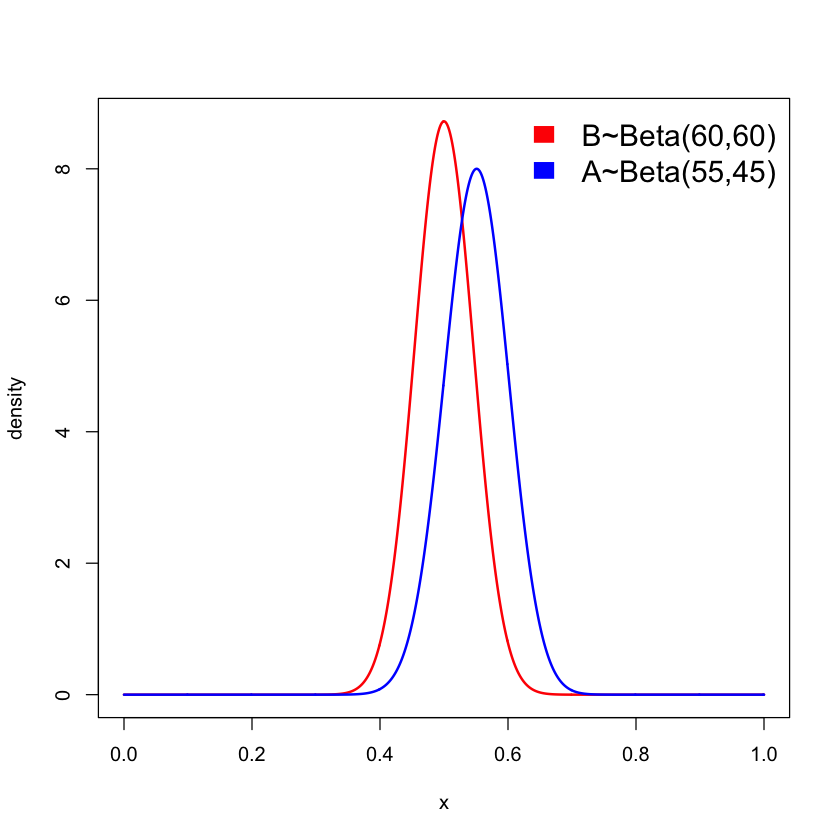

In [103]:
x<-seq(0,1,0.001)
plot(x,dbeta(x,60,60),type='l',col='red',lwd=2,ylab='density')
lines(x,dbeta(x,55,45),col='blue',lwd=2)
legend("topright",legend=c("B~Beta(60,60)","A~Beta(55,45)"),fill=c("red","blue"),border="white",box.lty=0,cex=1.5)


cat("P(A>B) = ",'\n')
integrate(function(x) dbeta(x,55,45)*pbeta(x,60,60),0,1)
          
cat("P(B>A) = ",'\n')
integrate(function(x) dbeta(x,60,60)*pbeta(x,55,45),0,1)

```
(참고)이항분포의 사후분포 유도 예시
```
$$p(x|\theta)\sim b(10,\theta)$$

$$p(x=3|\theta)={10 \choose 3} \theta^3 (1-\theta)^7$$

$$\pi(\theta) \sim uni(0,1),\pi(\theta)=1$$

\begin{eqnarray}
p(\theta|x=3) &=& \frac{\pi(\theta)f(|\theta)}{\int \pi(\theta)f(x|\theta)d\theta} \nonumber\\
&=& \frac {\pi(\theta) {10 \choose 3} \theta^3 (1-\theta)^7 }{\int \pi(\theta) {10 \choose 3}\theta^3 (1-\theta)^7 d\theta} \nonumber\\
&=& \frac{\theta^3(1-\theta)^7}{\frac{\Gamma (8)\Gamma (4)}{\Gamma (12)}  {\int \frac{\Gamma (12)}{\Gamma (8)\Gamma (4)}\theta^3 (1-\theta)^7 d\theta} } \quad \because \pi(\theta)=1 \nonumber \\
&=& \frac {\Gamma (12)}{\Gamma (8) \Gamma (4)} \theta^3(1-\theta)^7  \quad \because \int_0^1 \frac{\Gamma (12)}{\Gamma (8)\Gamma (4)} \theta^3 (1-\theta)^7 d\theta = 1 \nonumber \\
&\sim& Beta(4,8) \nonumber \\
\end{eqnarray}

$$\therefore p(\theta|x=3) \sim Beta(3+1,10-3+1)$$

#### 단점
1. 항상 사후분포를 알 수 있을까 ? no, MCMC를 통해 사후분포 근사
2. 결론은 직관적이지만 과정은 복잡함